# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---
* [1. 모델 생성](#모델-생성 ) <br>
    *  [ Sequential](#Sequential)
    *  [Dense](#Dense)
    *  [Flatten](#Flatten)

* [1. Sequential 모델 인자 3가지 방법](#인자-3가지 ) <br>
     *  [문자열](#문자열)
     *  [객체 인스턴스](#객체-인스턴스)
     *  [함수](#함수)

 
* [2. 모델 구성 요소](#모델-구성-요소) <br>
     *  [input layer 초기값 설정](#초기값-설정)
     *  [summary-해석](summary-해석)
     * [ input_shape](#input_shape)
     * [ Activation Function](#Activation-Function)
     * [ output layer ](#output-layer )
         * [ Multi-class Classification](#Multi-class-Classification)
         * [ Binary Classification](#Binary-Classification)
         * [ Regression](#Regression)
      * [ 도전: Iris](#도전:-Iris)
      * [ 도전: mnist](#도전:-mnist)
          * [ 데이터셋 가져오기](#데이터셋-가져오기)<br>
          * [ 데이터 탐색](#데이터-탐색)<br>
          * [ 데이터 전처리](#데이터-전처리)<br>
              * [normalization ](#normalization)<br>

* [3. 학습 ](#학습) <br>
     *  [학습전략 compile](#학습-전략-compile)
         *  [loss](#loss)
              *  [분류 문제: cross entorpy](#cross-entorpy)
         *  [optimizer](#optimizer)
         *  [metrics](#metrics)
     *  [학습 fit](#학습-fit)
         *  [epoch](#epoch)
         *  [batch size](#batch-size)
     *  [예측 predict](#예측-predict)

 ---

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
tf.__version__

'2.3.0'

## 모델 생성
Keras에서 모델 만드는 3가지 방법
- **Sequential (제일 간단)**
- Model : functional Paradigm(기본)/ class 상속


## Sequential
- keras에서 모델을 만드는 방법은 3가지 중 하나
- `Sequential`사용 한 다음 단순하게 레이어를 차례대로 쌓음
- 단방향으로만 가능(양방향 불가)

- 레이어에 전달하는 키워드 인수는 레이어 종류에 따라 다름


### Dense
- fully connected: 모든 노드들이 서로 연결 되어 있음
- `add` 메소드 통해서 추가 가능


MPG 데이터는 다양한 것을 이용해서  자동차 연비 예측하는 회귀(regression) 문제
Regression의 output layer에서 실제값 1개 만 나오므로 활성 함수 불필요

- 출처 : https://www.tensorflow.org/tutorials/keras/regression

### Flatten
 - `input_shape` 은 1차원을 입력받는데 `Flatten`이용해서 2차원으로 받음
- `Flatten`은 입력받은 데이터를 1차원으로 변환(펴줌)

- 아래 코드에서 이상한점

#### Dropout
- 갯수 많으면 overfitting을 방지하기 위해서  0.2 만큼 랜덤하게 전체의 20%의 퍼셉트론을 없앰
- 추후 자세히 다룰 예정

In [4]:
#Flatten 활용 예시.
model2 = tf.keras.models.Sequential([
    #몇개 들어온지 모름 
    tf.keras.layers.Flatten(input_shape=(3,3))# 데이터 3x3
])
model2.summary() #결과는 1차원으로 변경

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


왜 파라미터가 40개인지 도전
- 3x3 1개의 데이터가 flatten을 통해서 9개로 입력되어 4개의 노드에 각각 9개씩 입력되어 36개
- 4개의 편향을 추가
    - 총 40개

- summary 의 Output Shape : (None, 9)
    - 3x3이 크기의 데이터가 몇세트 들어오든 상관 없도록 지정 안함

In [7]:
#Flatten 활용 예시.
model2 = tf.keras.models.Sequential([
    #몇개 들어온지 모름 
    tf.keras.layers.Flatten(input_shape=(3,3)),# 3x3 데이터 한 세트의 영향
    tf.keras.layers.Dense(4) #1 차원만 받으면 오케이
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


아래애서는 학습 시키지 않고 `input_shape` 크기 맞았는지 확인용으로 넣음

In [7]:
a= np.arange(9).reshape(1,3,3)  #3x3 데이터 1개
a

array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]])

In [8]:
model2.predict(a)

array([[0., 1., 2., 3., 4., 5., 6., 7., 8.]], dtype=float32)

In [5]:
a= np.arange(27).reshape(3,3,3)  #2차원 데이터 3개
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [6]:
model2.predict(a) 

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.]], dtype=float32)

## 인자 3가지
### 문자열 
- 글자 spelling 틀리면 Error 
- 값 바꾸기 힘들어서 한정적이므로 제일 우아하지 못함

`activation='relu'`,`activation='softmax'`

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),  #함수로 교체 사용 가능 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 객체 인스턴스
- `Sequential`에서 기본값에서 다른 값 변경이 제일 쉬우나 class를 제공하지 않으면 문자열/function 사용 


- Class는 인스턴스해서 사용 
- 초기값 변경해서 사용 가능 

In [10]:
tf.keras.losses.sparse_categorical_crossentropy  #function

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [11]:
#Camel방식 == class
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Class

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['acc'])

Q.같은 텐서플로우 라이브러리에서 다른 모듈간의 저수준 고수준 무슨 차이?
- 이미 만들어져 있냐 아니냐에 따라서 나뉨
    - 고수준 API
        - 쉬운 사용: 간단한 코드로 신경망 모델 생성 가능
        - 저수준을 기반
        - kearas 라이브러리
    - 저수준 API
        - 유연성: 각종 paramete를 사용자가 사전에 선언/정의하기 때문에 parameter 값 수정 가능
        - tf.nn

### 함수
`activation= 'relu'` 를  `tf.keras.activations.relu`, `tf.nn.relu `함수로 교체 가능
- 기본값 지정되어 있음

- 이미 만들어진 고수준으로 사용할 때에는  `tf.keras.activations.relu `
- 처음부터 하나하나 만들어지는 저수준 사용할 때에는  `tf.nn.relu` 

In [13]:
tf.keras.activations.relu # keras의 function 사용시 어떻게 사용할까

<function tensorflow.python.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)>

  `activation =relu` 사용 시 내부적으로 `tf.nn.relu` 사용

In [14]:
tf.nn.relu                #nn의 패키지의  function- low level(저수준)

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

function 바꾸고 싶은 경우 **decorator**(python 개념으로 `@ `이용) 이용해서 상속해서 바꿈

- Sequential 쉽게 사용하는 방법이라서 바꾸는 기능이 부족해서 decorator로 변경 가능하나 굳이...
- model 사용하면 변경 쉬움 (중급 수준)

고수준 저수준 혼용 사용 가능.
- higher order function : function 은 함수의 인자로 들어 갈 수잇음 

In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),  #함수로 교체 사용 가능 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

기본적인 과정을 거치었으니 많은 옵션을 배울 예정
sequential 다음으로 배울 model은 functional 방식으로 모두 function 사용 

## 모델 구성 요소
### 초기값 설정
  - `kernel_initializer` :가중치 $w$  초기화
  - `bias_initialize` : 편향 $b$ 초기화
   - `Zeros`: 모든 값이 0 텐서를 생성
   - `ones` :모든 값이 1 텐서를 생성
   - `RandomNormal`: 정규분포에 따라 텐서를 생성하는 초기값 설정
   
   input_shape은 입력 데이터의 형태를 2차원에서 1차원으로 바꾸어 차례대로 넣음



In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, kernel_initializer='ones',
                                bias_initializer ='ones',input_shape=(4,))) # 3개 4
model.add(tf.keras.layers.Dense(3,  kernel_initializer='ones',
                                bias_initializer ='ones'))

#### summary 해석
1. 첫번째
   - 4개짜리가 4개의 노드에 들어가야하므로 16개 필요
   - 각각의  bias가  있으므로 4개, 총 20개
2. 두번째
   - 4개짜리가 3개의 노드에 들어가야하므로 12개 필요
   - 각각의  bias가  있으므로 3개, 총 15개  
3. 총 파라미터 수(trainable)
     - 20+ 15= 35
 

None : 몇개의 데이터가 들어오는지 지정하지 않음 

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


### input_shape
- 데이터의 크기에 맞추어 입력
    - Dense: 1차원으로 변경
    - Flatten: 2차원에서 자동으로 1차원 변경

In [36]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))

In [37]:
a= np.array([[1,2,3,4],[1,3,4,5],[1,3,4,5]]) #4x1 데이터 3개
a.shape

(3, 4)

In [39]:
model.predict(a)

array([[0.        , 0.689519  , 0.        ],
       [0.        , 0.70586187, 0.        ],
       [0.        , 0.70586187, 0.        ]], dtype=float32)

### Activation Function
- activation function : wx+b값을 집어넣어서 변환하여 다음 레이어로 보냄

장단점

- step
    - 0 for $ x <0 $
    - 1 for $ x \geq 0$
- sigmoid
    - $f(x) = \sigma(x) = \frac{1}{1+ exp(-x)} $
- hyperbolic tangent
    - $ f(x)= tanh(x)= \frac{\sinh(x)}{\cosh(x) }= \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x) } =\frac{\exp(2x)-1}{\exp(2x)+1 } $
    
 위의 함수들은 레이어가 많아지면서  gradient vanishing 문제 때문에 학습이 잘 안됨.
 - 이론 공부를 위해서 배우는것

- Relu :
    - $f(x)= max(0,x)$ ,0 보다 작으면 0, 크면 y=x
    - 선형 이면 안되지만 일부만 선형이라서 가능 
    - **gradient vanishing 문제를 겪지 않아 기본으로 사용**
 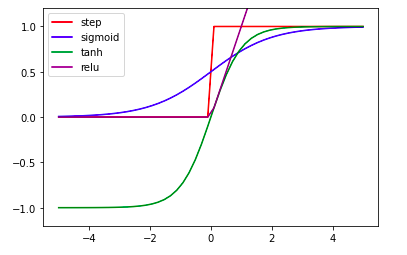
 
참고 :[2020.08.10수업](https://github.com/hysKim1/AI_Fundamental/blob/master/200810_11기_기본저녁반_필기.ipynb)

In [99]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu')) #1줄에 씀
model.add(tf.keras.layers.Dense(3))  #2 줄에 씀
model.add(tf.keras.layers.Activation('relu'))

## Output Layer
### Multi-class Classification
- 최종 결과가 target 갯수 만큼 나와야 하므로 크기를 맞추는게 중요
- 마지막 레이어의 activation function 은 `softmax`
   - 각 3개의 결과 값을 확률처럼 변환
    예. [0.1, 0.1 , 0.3 ] -> [ 0.2, 0.2,0.6]  합이 1 

In [40]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))
#output layer 추가
model.add(tf.keras.layers.Dense(3, activation='softmax'))  #3개의 target: 0,1,2                               use_bias=False)) 

### Binary Classification
 - 이진 분류하여 0,1 만 나옴 

In [41]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))
#output layer 추가
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

위에서 하나의 perceptron 사용하는것이 아래의 2개보다 간단하므로 위에를 더 많이 씀
> 오캄의 면도날 : 같으면 간단한게 좋다

In [44]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='relu'))
#output layer 추가
model.add(tf.keras.layers.Dense(2, activation='softmax'))  # target 실수값

### Regression
 output layer에 실수값 1로 나오도록 해야하기 때문 

In [22]:
model=tf.keras.models.Sequential()  #모델 초기화 
model.add(tf.keras.layers.Dense(4, input_shape=( 28*28,), activation='relu')) 
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))
#output layer 추가
model.add(tf.keras.layers.Dense(1))  #3개의 target: 0,1,2 

---
## 도전: Iris

In [45]:
import seaborn as sns

In [46]:
iris= sns.load_dataset('iris')

In [47]:
iris.species=iris.species.map({'setosa':0, 'versicolor':1, 'virginica':2})

실제 iris 데이터로 input_shape 맞추어 보기

In [48]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(4,),activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [49]:
model.fit(iris.iloc[:,:-1],iris.species, epochs=5)

Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 1.7024 - acc: 0.3333
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 1.6654 - acc: 0.3333
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 1.6297 - acc: 0.3333
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 1.5920 - acc: 0.3333
Epoch 5/5
5/5 [==============================] - 0s 7ms/step - loss: 1.5556 - acc: 0.3333


feed forward
- `predict`

두개의 데이터를 입력하였더니 하단과 같이 두 데이터 모두  1번째 class(versicolor) 

In [51]:
model.predict([[3,3,3,3],[1,2,1,2]]) #둘다 1번째가 제일 큼

array([[0.11426768, 0.4439281 , 0.4418042 ],
       [0.28138536, 0.35965306, 0.35896164]], dtype=float32)

In [53]:
model.predict_classes([[3,3,3,3],[1,2,1,2]])

array([1, 1])

---
## 도전: mnist

> 딥러닝 과정 복습
    1. 데이터불러오기
    2. holdout
        - unapcking
    3, 모델 구축
    4. 모델 학습전략 
        - compile
    5. 모델 학습 
        - fit
    6. 모델 검정 evaluatie

## 데이터셋 가져오기
### holdout
- 정확한 성능 측정을 위해서 train,test 로 나누어 확인

In [54]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

 ## 데이터 탐색
 - 훈련 전 데이터셋 구조 확인
 
 6만개 train,1만개 tests 데이터가 28 by 28 크기임

In [55]:
X_train.shape,X_test.shape #2차원 데이터 총 70,000개

((60000, 28, 28), (10000, 28, 28))

- 데이터 1차원 변환

In [56]:
 # 이미지를 1차원으로 변경해야함 28*28
X_train_= X_train.reshape(60000,28*28)
X_test_= X_test.reshape(10000,28*28)

- 각 클래스별로 몇개의 데이터가 있는지 
    - 0~9 까지 10개의 target

In [57]:
np.unique(y_train, return_counts=True) # 5000개 이상의 수 포함

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

https://www.tensorflow.org/tutorials/keras/classification 정독

## 데이터 전처리
### normalization 
- minmax scaler(정규화) 하여 값을 0~1 로 바꿈 
- Neural Network는  0~1사이값으로 했어서 경험적으로 정규화 하였을 때 더 빠르고 학습이 잘 됨.

- 이미지 데이터 정규화: $\frac{x-Min}{Max-Min}=\frac{x-0}{255-0}=\frac{x}{255}$
    - 이미지 데이터틑 0~255사이 값을 갖음

## 모델 구성
- softmax
    - 결과값을 확률처럼 만들어줌

In [58]:
model=tf.keras.models.Sequential()  #모델 초기화 
model.add(tf.keras.layers.Dense(4, input_shape=( 28*28,), activation='relu')) 
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('relu'))
#output layer 추가
model.add(tf.keras.layers.Dense(10, activation='softmax'))  #10개의 target: 0,1,2                               use_bias=False)) 

- `model=tf.keras.models.Sequential()` 이용하지 않으면 기존 모델에 계속 추가되므로 초기화 해서 사용
- 아래와 `Sequentials`의 인자로 넣기도 가능  

In [59]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=(28*28,),activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])
    
 #   50:00 tensorflow page 초보자를 위한 빠른 시작 -거슬리는거

---
### 도전: fashion_mnist 
- 이미지 분류 모델 만들기

In [60]:
#기본 이미지 분류
(X_train, y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

#### unique
- 유일한 값들만 보여줌

 0~9 까지 10개의 target 이 있음. 

In [61]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [63]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #10개로 분류
])

In [64]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_45 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


### 학습
- 예측값과 실제값을 최소화 시키는 weight, bias 를 찾음.
- 숫자값인 경우 그 차이를 최소화
    - mse
- 숫자값이 아닌우 entropy 개념을 도입함
    - loss function : crossentorpy
    
학습 하기 전에 compile해야함

> ### No Free Lunch 
   - 안타깝지만 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 **마법같은 공식은 없습니다.** 여러 가지 다른 구조를 사용해 실험을 해봐야만 합니다.
    
- `GridSerachCV`를 통해서 최적의 모델은 모든 조합을 다 시도하고 feed forward한 값과 실제 값 가장 차이 적은 파라미터들을 학습 시킴
 학습 전략 : 가장 차이가 적은 파라미터 $w,b$ 

## 학습 전략 compile
- `compile`
### loss
- `loss` : 예측값과 실제값간의 차를 나타내는 손실 함수
    - regression(회귀): MSE(Mean Squared Error)
    - classification(분류): cross entropy

#### cross entorpy
- entropy: 정보이론에서 불확실성에 대한 척도
    - 높은 entropy는 정보량이 많고 확률이 낮음
    - 예. 동전던지기의 entropy < 주사위 던지기의 entropy
   
- **classification(분류 문제)** :  a 인데 b로 예측은 구할 수 없으므로 실제값과 예측값간의 확률의 차이를 대표하는 function으로 cross entropy(교차 엔트로피) 도입
     - 맞는경우 0 수렴
     - 틀린 경우 값 커짐
          - 1) binary_crossentropy : 이진 분류
          - 2) categorical_crossentropy: y 값이 one-hot encoding인 경우의 다중 분류 
          - 3) sparse_categorical_crossentropy: y 값이 label encoding인 경우의 다중 분류 
     - 추후 구체적으로 다룰 예정

### optimizer
- $w,b$를 최적화하기위해 gradient descent 에서 사용하는 최적화 알고리즘 
    - adam (adaptive moment estimation)- 기본으로 사용 
       이함수를 최소화 하는 gradient descent 방식으로 최소화.
        - 파라미터마다 다른 크기의 업데이트를 적용
        - 방향, 스텝 사이즈 적당히   
        
### metrics
- 성능평가지표들
    - accuracy, precision,recall..
    
    [2020.08.03](https://github.com/hysKim1/AI_Fundamental/blob/master/200803_11기_기본저녁반_필기.ipynb) 참고

In [65]:
model.compile(loss='sparse_categorical_crossentropy',  #분류문제
             optimizer='adam',
             metrics=['acc'])

## 학습 fit
- `fit`

### epoch
epoch: 전체 데이터를 학습한 횟수
 - 1 epoch :전체 데이터를 한번 학습
- epoch 가 많을수록 학습한 것을 더 학습하면 점점 더 정확한 $w,b$찾음
    - 점점 `loss`가 작아짐
    - 점점 `accuracy` 증가
    - overfitting 의 가능성 증가 (train > test)

`epochs=5`: 전체 데이터 학습 5번

In [83]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9093 - acc: 0.4786
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0804 - acc: 0.5770A: 
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9175 - acc: 0.6305
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7731 - acc: 0.6959
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6828 - acc: 0.7285


### batch size
- 몇 개의 데이터를 입력 받고 최소화하는 $w,b$를 찾을 것인지
    > Q. 수학 문제를 풀 때 ...
        - 한 단원 다 풀고 답 확인?
        - 몇문제 보고 답 확인
        - 1 문제 보고 답 확인
- 문제를 다풀고 보면 비슷한 문제가 나왔을때 틀리므로 몇문제씩 보고 풀면 시간 많이 걸리나 그 다음에서 정답확률이 높음
    - 경우에 따라서  학습 속도, loss,accuracy 다름
     -  batch_size가 클수록 더 빠르나 메모리 크기가 더 커야함.
- 상황에 따라서 적정 사이즈 구하는게 중요
    - 마법이 없음.

In [84]:
model.fit(X_train,y_train, epochs=5,batch_size=12) #학습시간 오래걸림. 10s

Epoch 1/5
5000/5000 [==============================] - 10s 2ms/step - loss: 0.7135 - acc: 0.7224
Epoch 2/5
5000/5000 [==============================] - 12s 2ms/step - loss: 0.6552 - acc: 0.7388
Epoch 3/5
5000/5000 [==============================] - 12s 2ms/step - loss: 0.6282 - acc: 0.7487
Epoch 4/5
5000/5000 [==============================] - 10s 2ms/step - loss: 0.6154 - acc: 0.7513
Epoch 5/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.6008 - acc: 0.7554


In [85]:
model.fit(X_train,y_train, epochs=5,batch_size=128) #학습시간빠름 1s (약 10배 빠름ㅇ)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5413 - acc: 0.7722
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5319 - acc: 0.7753
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5302 - acc: 0.7764
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5267 - acc: 0.7776
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5268 - acc: 0.7792


## 예측 predict
- `predict`
    - 학습에 사용하지 않은데이터를 통해서 예측함

In [112]:
model.summary()
model.predict(X_test)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


array([[0.0000000e+00, 0.0000000e+00, 8.1216761e-21, ..., 2.3729074e-24,
        1.0000000e+00, 0.0000000e+00],
       [3.3797782e-25, 5.4087121e-30, 7.8079367e-01, ..., 1.1032401e-07,
        2.1919952e-01, 4.2397892e-33],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 5.3544226e-12,
        6.6328168e-21, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.9020265e-18, ..., 1.0000000e+00,
        3.1278344e-11, 0.0000000e+00],
       [1.0172147e-35, 0.0000000e+00, 5.1511416e-13, ..., 4.4487621e-08,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.6282454e-20, ..., 1.0000000e+00,
        3.2153671e-31, 0.0000000e+00]], dtype=float32)